# Financial Data Analysis

## Importing and Exporting Stock Price Data from Yahoo Finance

In [ ]:
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [ ]:
ticker = ["AAPL", "BA", "KO", "IBM", "DIS", "MSFT" ]

In [ ]:
stocks = yf.download(ticker, start = "2010-01-01", end = "2019-02-06")

In [ ]:
stocks.head()

In [ ]:
stocks.tail()

In [ ]:
stocks.info()

In [ ]:
stocks.to_csv("stocks.csv")

In [ ]:
stocks = pd.read_csv("stocks.csv", header = [0, 1], index_col = [0], parse_dates = [0])

In [ ]:
stocks.head()

In [ ]:
stocks.columns = stocks.columns.to_flat_index()

In [ ]:
stocks.columns

In [ ]:
stocks.columns = pd.MultiIndex.from_tuples(stocks.columns)

In [ ]:
stocks.head()

In [ ]:
stocks.swaplevel(axis = 1).sort_index(axis = 1)

## Initial Inspection and Visualization

In [ ]:
import pandas as pd

In [ ]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0])

In [ ]:
stocks.head()

In [ ]:
stocks.tail()

In [ ]:
stocks.info()

In [ ]:
stocks.describe()

In [ ]:
close = stocks.loc[:, "Close"].copy()

In [ ]:
close.head()

In [ ]:
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [ ]:
close["MSFT"].plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## Normalizing Time Series to a Base Value (100)

In [ ]:
close.head()

In [ ]:
close.iloc[0,0]

In [ ]:
close.AAPL.div(close.iloc[0,0]).mul(100)

In [ ]:
close.iloc[0]

In [ ]:
norm = close.div(close.iloc[0]).mul(100)
norm

In [ ]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

## The shift() method

In [ ]:
close.head()

In [ ]:
aapl = close.AAPL.copy().to_frame()

In [ ]:
aapl.head()

In [ ]:
aapl.shift(periods = 1)

In [ ]:
aapl["lag1"] = aapl.shift(periods = 1)

In [ ]:
aapl.head()

In [ ]:
aapl.AAPL.sub(aapl.lag1)

In [ ]:
aapl["Diff"] = aapl.AAPL.sub(aapl.lag1)

In [ ]:
aapl.head()

In [ ]:
aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [ ]:
aapl["pct_change"] = aapl.AAPL.div(aapl.lag1).sub(1).mul(100)

In [ ]:
aapl.head()

## The methods diff() and pct_change()

In [ ]:
aapl.head()

In [ ]:
aapl.AAPL.diff(periods = 2)

In [ ]:
aapl["Diff2"] = aapl.AAPL.diff(periods = 1)

In [ ]:
aapl.head(10)

In [ ]:
aapl.Diff.equals(aapl.Diff2)

In [ ]:
aapl["pct_change2"] = aapl.AAPL.pct_change(periods = 1).mul(100)

In [ ]:
aapl.head()

In [ ]:
aapl.AAPL.resample("BM").last().pct_change(periods =1).mul(100)

## Measuring Stock Perfromance with MEAN Return and STD of Returns

In [ ]:
import numpy as np

In [ ]:
aapl = close.AAPL.copy().to_frame()

In [ ]:
aapl.head()

In [ ]:
aapl.pct_change().dropna()

In [ ]:
ret = aapl.pct_change().dropna()
ret.head()

In [ ]:
ret.info()

In [ ]:
ret.plot(kind = "hist", figsize = (15 ,9), bins = 100)
plt.show()

In [ ]:
daily_mean_Return = ret.mean()
daily_mean_Return*100

In [ ]:
var_daily_Returns = ret.var()
var_daily_Returns*100

In [ ]:
std_daily_Returns = np.sqrt(var_daily_Returns)
std_daily_Returns*100

In [ ]:
ret.std()

In [ ]:
ann_mean_Return = ret.mean() * 252
ann_mean_Return*100

In [ ]:
ann_var_Returns = ret.var() * 252
ann_var_Returns

In [ ]:
ann_std_Returns = np.sqrt(ann_var_Returns)
ann_std_Returns

In [ ]:
ret.std() * np.sqrt(252)

## Financial Time Series - Return and Risk

In [ ]:
import numpy as np

In [ ]:
norm.plot(figsize = (15, 8 ), fontsize = 13)
plt.legend(fontsize = 13)
plt.show()

In [ ]:
close.head()

In [ ]:
close.pct_change().dropna()

In [ ]:
ret = close.pct_change().dropna()

In [ ]:
ret.head()

In [ ]:
ret.describe().T.loc[:, ["mean", "std"]]

In [ ]:
summary = ret.describe().T.loc[:, ["mean", "std"]]
summary

In [ ]:
summary["mean"] = summary["mean"]*252
summary["std"] = summary["std"] * np.sqrt(252)

In [ ]:
summary

In [ ]:
summary.plot(kind = "scatter", x = "std", y = "mean", figsize = (15,12), s = 50, fontsize = 15)
for i in summary.index:
    plt.annotate(i, xy=(summary.loc[i, "std"]+0.002, summary.loc[i, "mean"]+0.002), size = 15)
plt.xlabel("ann. Risk(std)", fontsize = 15)
plt.ylabel("ann. Return", fontsize = 15)
plt.title("Risk/Return", fontsize = 20)
plt.show()

## Financial Time Series - Covariance and Correlation

In [ ]:
ret.head()

In [ ]:
ret.cov()

In [ ]:
ret.corr()

In [ ]:
import seaborn as sns

In [ ]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.4)
sns.heatmap(ret.corr(), cmap = "Reds", annot = True, annot_kws={"size":15}, vmax = 0.6)
plt.show()

## Simple Returns vs. Log Returns

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.DataFrame(index = [2016, 2017, 2018], data = [100, 50, 95], columns = ["Price"])

In [3]:
df

,Price
2016,100
2017,50
2018,95


In [4]:
simple_returns = df.pct_change().dropna()
simple_returns

,Price
2017,-0.5
2018,0.9


In [5]:
simple_returns.mean()

Price    0.2
dtype: float64

In [6]:
100 * 1.2 * 1.2

144.0

In [7]:
df

,Price
2016,100
2017,50
2018,95


In [8]:
np.log(df / df.shift(1))

,Price
2016,NaN
2017,-0.693147
2018,0.641854


In [9]:
log_returns = np.log(df / df.shift(1)).dropna()

In [10]:
log_returns

,Price
2017,-0.693147
2018,0.641854


In [11]:
log_returns.mean()

Price   -0.025647
dtype: float64

In [12]:
100 * np.exp(2 * log_returns.mean())

Price    95.0
dtype: float64

## Importing Financial Data from Excel

In [13]:
import pandas as pd

In [15]:
pd.read_excel("SP500.xls").info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12107 entries, 0 to 12106
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       12107 non-null  datetime64[ns]
 1   Open       12107 non-null  float64       
 2   High       12107 non-null  float64       
 3   Low        12107 non-null  float64       
 4   Close      12107 non-null  float64       
 5   Adj Close  12107 non-null  float64       
 6   Volume     12107 non-null  int64         
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 662.2 KB


In [16]:
pd.read_excel("SP500.xls", parse_dates= ["Date"], index_col = "Date")

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002,92.150002,13390000
1971-01-04,92.150002,92.190002,90.639999,91.150002,91.150002,10010000
1971-01-05,91.150002,92.279999,90.690002,91.800003,91.800003,12600000
1971-01-06,91.800003,93.000000,91.500000,92.349998,92.349998,16960000
1971-01-07,92.349998,93.260002,91.750000,92.379997,92.379997,16460000
...,...,...,...,...,...,...
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117,2416.620117,-980924592
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098,2351.100098,-1681037296
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951,2467.699951,-60977296


In [17]:
pd.read_excel("SP500.xls", parse_dates= ["Date"], index_col = "Date", usecols = "A, C:E")

,High,Low,Close
Date,,,
1970-12-31,92.790001,91.360001,92.150002
1971-01-04,92.190002,90.639999,91.150002
1971-01-05,92.279999,90.690002,91.800003
1971-01-06,93.000000,91.500000,92.349998
1971-01-07,93.260002,91.750000,92.379997
...,...,...,...
2018-12-21,2504.409912,2408.550049,2416.620117
2018-12-24,2410.340088,2351.100098,2351.100098
2018-12-26,2467.760010,2346.580078,2467.699951


In [18]:
pd.read_excel("SP500.xls", sheet_name= "Sales")

,Unnamed: 0,City,Sales
0,Mike,New York,25
1,Jim,Boston,43
2,Steven,London,76
3,Joe,Madrid,12
4,Tom,Paris,89


In [19]:
SP500 = pd.read_excel("SP500.xls", parse_dates= ["Date"], index_col = "Date", usecols= "A:E")

In [20]:
SP500.head()

,Open,High,Low,Close
Date,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002
1971-01-04,92.150002,92.190002,90.639999,91.150002
1971-01-05,91.150002,92.279999,90.690002,91.800003
1971-01-06,91.800003,93.000000,91.500000,92.349998
1971-01-07,92.349998,93.260002,91.750000,92.379997


In [21]:
SP500.tail()

,Open,High,Low,Close
Date,,,,
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990


In [22]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [23]:
SP500.to_csv("SP500.csv")

In [25]:
SP500.to_excel("SP500_red.xls")

c:\users\ashwin dev\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  """Entry point for launching an IPython kernel.


## Simple Moving Averages (SMA) with rolling()

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use("seaborn")

In [2]:
SP500 = pd.read_csv("SP500.csv", parse_dates = ["Date"], index_col = "Date")

In [3]:
SP500.head()

,Open,High,Low,Close
Date,,,,
1970-12-31,92.269997,92.790001,91.360001,92.150002
1971-01-04,92.150002,92.190002,90.639999,91.150002
1971-01-05,91.150002,92.279999,90.690002,91.800003
1971-01-06,91.800003,93.000000,91.500000,92.349998
1971-01-07,92.349998,93.260002,91.750000,92.379997


In [30]:
SP500.tail()

,Open,High,Low,Close
Date,,,,
2018-12-21,2465.379883,2504.409912,2408.550049,2416.620117
2018-12-24,2400.560059,2410.340088,2351.100098,2351.100098
2018-12-26,2363.120117,2467.760010,2346.580078,2467.699951
2018-12-27,2442.500000,2489.100098,2397.939941,2488.830078
2018-12-28,2498.770020,2520.270020,2472.889893,2485.739990


In [31]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 12107 entries, 1970-12-31 to 2018-12-28
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Open    12107 non-null  float64
 1   High    12107 non-null  float64
 2   Low     12107 non-null  float64
 3   Close   12107 non-null  float64
dtypes: float64(4)
memory usage: 472.9 KB


In [6]:
SP500 = SP500.Close.to_frame()

In [7]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


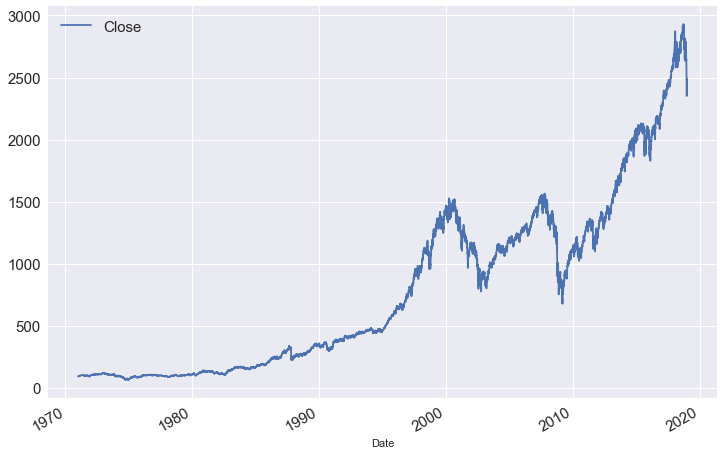

In [38]:
SP500.plot(figsize = (12,8), fontsize= 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [19]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"]

In [20]:
SP500.rolling(window = 10)

Rolling [window=10,center=False,axis=0]

In [42]:
type(SP500.rolling(window = 10))

pandas.core.window.rolling.Rolling

In [43]:
SP500.head(15)

,Close
Date,
2008-12-31,903.250000
2009-01-02,931.799988
2009-01-05,927.450012
2009-01-06,934.700012
2009-01-07,906.650024
2009-01-08,909.729980
2009-01-09,890.349976
2009-01-12,870.260010
2009-01-13,871.789978


In [44]:
SP500.rolling(window = 10).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


In [45]:
SP500.rolling(window = 10).median()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,NaN
...,...
2018-12-21,2573.054931
2018-12-24,2546.049926
2018-12-26,2526.449951


In [46]:
SP500.rolling(window = 10, min_periods=5).mean()

,Close
Date,
2008-12-31,NaN
2009-01-02,NaN
2009-01-05,NaN
2009-01-06,NaN
2009-01-07,920.770007
...,...
2018-12-21,2565.915991
2018-12-24,2537.254004
2018-12-26,2520.345996


## Momentum Trading Strategies with SMAs

In [21]:
SP500.head()

,Close,SMA50,SMA200
Date,,,
2008-12-31,903.250000,887.264001,1184.5795
2009-01-02,931.799988,886.799001,1182.7464
2009-01-05,927.450012,887.412401,1180.7361
2009-01-06,934.700012,887.944202,1178.6602
2009-01-07,906.650024,888.541802,1176.4285


In [22]:
SP500.tail()

,Close,SMA50,SMA200
Date,,,
2018-12-21,2416.620117,2692.420195,2753.65980
2018-12-24,2351.100098,2684.874795,2751.48245
2018-12-26,2467.699951,2678.886196,2749.90585
2018-12-27,2488.830078,2673.646997,2748.52345
2018-12-28,2485.739990,2667.163398,2747.20475


In [23]:
SP500["SMA50"] = SP500.rolling(window = 50, min_periods=50).mean()

c:\users\ashwin dev\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [24]:
SP500

,Close,SMA50,SMA200
Date,,,
2008-12-31,903.250000,NaN,1184.57950
2009-01-02,931.799988,NaN,1182.74640
2009-01-05,927.450012,NaN,1180.73610
2009-01-06,934.700012,NaN,1178.66020
2009-01-07,906.650024,NaN,1176.42850
...,...,...,...
2018-12-21,2416.620117,2692.420195,2753.65980
2018-12-24,2351.100098,2684.874795,2751.48245
2018-12-26,2467.699951,2678.886196,2749.90585


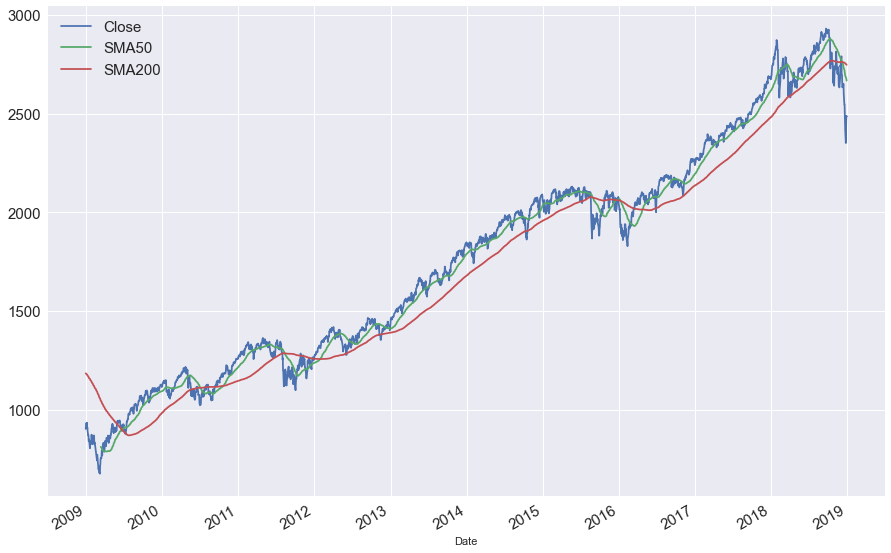

In [25]:
SP500.plot(figsize = (15, 10), fontsize = 15)
plt.legend(loc = "upper left", fontsize = 15)
plt.show()

In [26]:
SP500["SMA200"] = SP500.Close.rolling(window = 200).mean()

c:\users\ashwin dev\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [27]:
SP500.tail()

,Close,SMA50,SMA200
Date,,,
2018-12-21,2416.620117,2692.420195,2753.65980
2018-12-24,2351.100098,2684.874795,2751.48245
2018-12-26,2467.699951,2678.886196,2749.90585
2018-12-27,2488.830078,2673.646997,2748.52345
2018-12-28,2485.739990,2667.163398,2747.20475


In [28]:
SP500.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2516 entries, 2008-12-31 to 2018-12-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   2516 non-null   float64
 1   SMA50   2467 non-null   float64
 2   SMA200  2317 non-null   float64
dtypes: float64(3)
memory usage: 78.6 KB


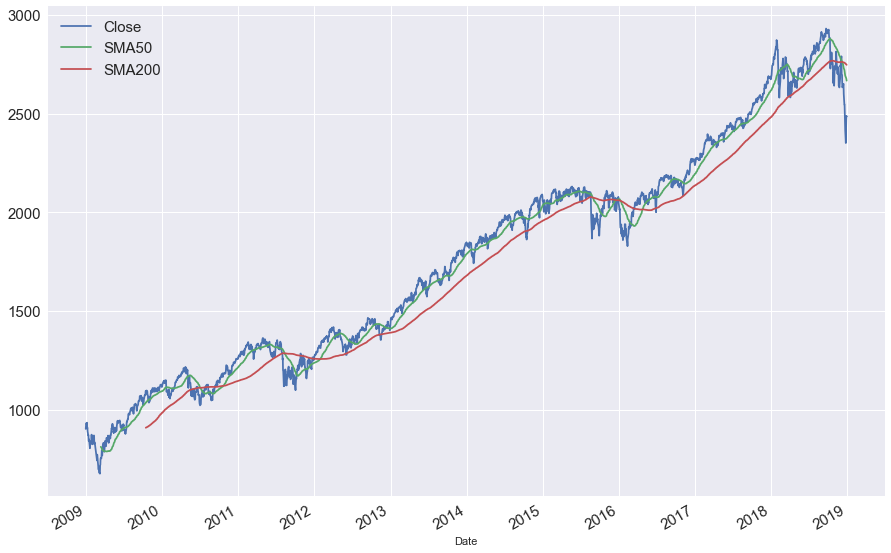

In [29]:
SP500.plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

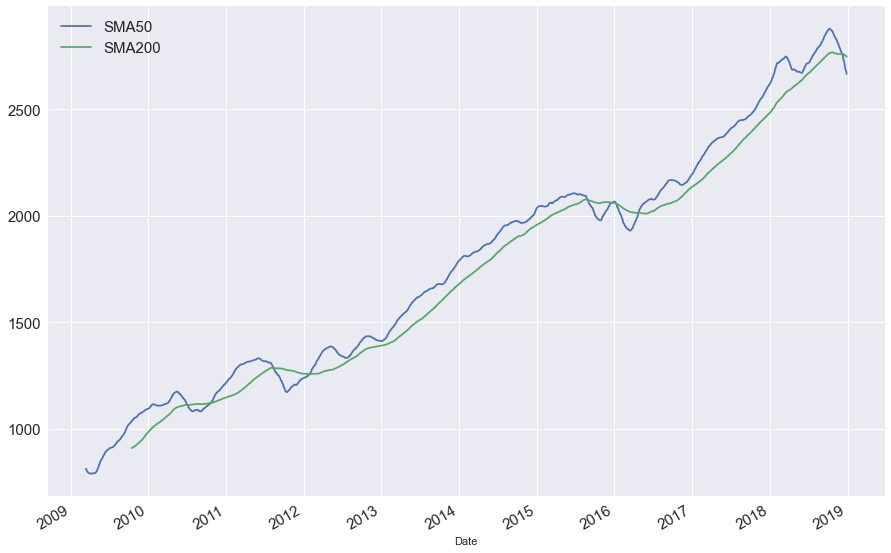

In [30]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize= 15)
plt.legend(fontsize = 15)
plt.show()

## Exponentially-weighted Moving Averages (EWMA)


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use("seaborn")

In [32]:
SP500 = pd.read_csv("SP500.csv", parse_dates= ["Date"], index_col= "Date", usecols= ["Date", "Close"])

In [33]:
SP500.head()

,Close
Date,
1970-12-31,92.150002
1971-01-04,91.150002
1971-01-05,91.800003
1971-01-06,92.349998
1971-01-07,92.379997


In [34]:
SP500 = SP500.loc["2008-12-31":"2018-12-31"].copy()

In [35]:
SP500.Close.rolling(window = 10).mean()

Date
2008-12-31            NaN
2009-01-02            NaN
2009-01-05            NaN
2009-01-06            NaN
2009-01-07            NaN
                 ...     
2018-12-21    2565.915991
2018-12-24    2537.254004
2018-12-26    2520.345996
2018-12-27    2504.121997
2018-12-28    2487.641992
Name: Close, Length: 2516, dtype: float64

In [36]:
SP500.Close.ewm(span = 10, min_periods= 10).mean()

Date
2008-12-31            NaN
2009-01-02            NaN
2009-01-05            NaN
2009-01-06            NaN
2009-01-07            NaN
                 ...     
2018-12-21    2547.124619
2018-12-24    2511.483797
2018-12-26    2503.523098
2018-12-27    2500.851640
2018-12-28    2498.104067
Name: Close, Length: 2516, dtype: float64

In [37]:
SP500["SMA"] = SP500.Close.rolling(window = 100).mean()
SP500["EMA"] = SP500.Close.ewm(span = 100, min_periods= 100).mean()

In [38]:
SP500

,Close,SMA,EMA
Date,,,
2008-12-31,903.250000,NaN,NaN
2009-01-02,931.799988,NaN,NaN
2009-01-05,927.450012,NaN,NaN
2009-01-06,934.700012,NaN,NaN
2009-01-07,906.650024,NaN,NaN
...,...,...,...
2018-12-21,2416.620117,2785.905496,2732.088580
2018-12-24,2351.100098,2781.282896,2724.544253
2018-12-26,2467.699951,2777.687695,2719.458228


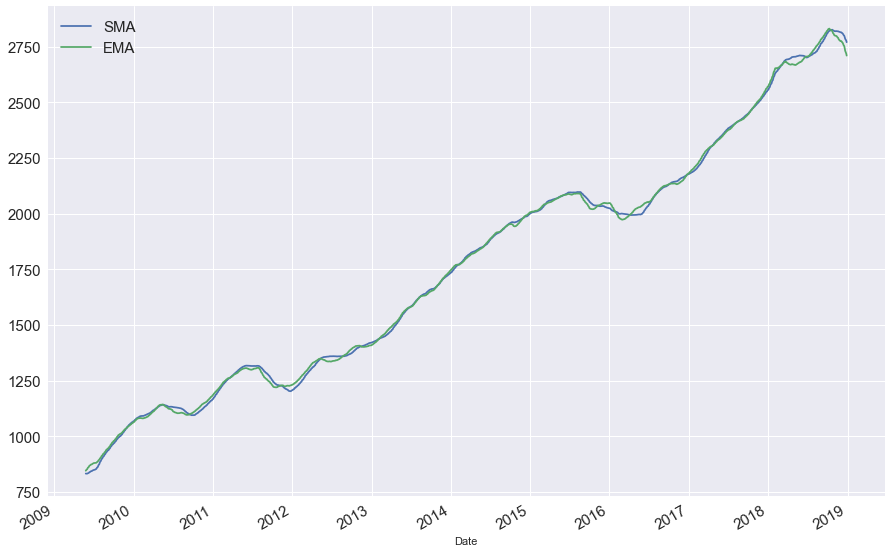

In [39]:
SP500.iloc[:,-2:].plot(figsize = (15,10), fontsize =15)
plt.legend(fontsize = 15)
plt.show()

### Merging Time Series

In [40]:
import pandas as pd

In [41]:
stocks = pd.read_csv("stocks.csv", header = [0,1], index_col= [0], parse_dates= [0]).Close

In [42]:
stocks.head()

,AAPL,BA,DIS,IBM,KO,MSFT
Date,,,,,,
2009-12-31,7.526071,54.130001,32.25,125.143402,28.500000,30.480000
2010-01-04,7.643214,56.180000,32.07,126.625237,28.520000,30.950001
2010-01-05,7.656429,58.020000,31.99,125.095604,28.174999,30.959999
2010-01-06,7.534643,59.779999,31.82,124.282982,28.165001,30.770000
2010-01-07,7.520714,62.200001,31.83,123.852776,28.094999,30.450001


In [43]:
aapl = stocks.loc["2010-01-01" : "2014-12-31", "AAPL"].to_frame()
aapl.head()

,AAPL
Date,
2010-01-04,7.643214
2010-01-05,7.656429
2010-01-06,7.534643
2010-01-07,7.520714
2010-01-08,7.570714


In [44]:
ba = stocks.loc["2012-01-01" : "2016-12-31", "BA"].to_frame()
ba.head()

,BA
Date,
2012-01-03,74.220001
2012-01-04,74.330002
2012-01-05,73.529999
2012-01-06,73.980003
2012-01-09,74.529999


In [45]:
aapl["BA"] = ba.BA

In [46]:
aapl.head()

,AAPL,BA
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,NaN
2010-01-06,7.534643,NaN
2010-01-07,7.520714,NaN
2010-01-08,7.570714,NaN


In [47]:
aapl.tail()

,AAPL,BA
Date,,
2014-12-24,28.002501,131.240005
2014-12-26,28.497499,131.630005
2014-12-29,28.477501,132.289993
2014-12-30,28.129999,131.830002
2014-12-31,27.594999,129.979996


In [48]:
aapl.dropna()

,AAPL,BA
Date,,
2012-01-03,14.686786,74.220001
2012-01-04,14.765714,74.330002
2012-01-05,14.929643,73.529999
2012-01-06,15.085714,73.980003
2012-01-09,15.061786,74.529999
...,...,...
2014-12-24,28.002501,131.240005
2014-12-26,28.497499,131.630005
2014-12-29,28.477501,132.289993


In [49]:
ba.reindex(aapl.index).dropna()

,BA
Date,
2012-01-03,74.220001
2012-01-04,74.330002
2012-01-05,73.529999
2012-01-06,73.980003
2012-01-09,74.529999
...,...
2014-12-24,131.240005
2014-12-26,131.630005
2014-12-29,132.289993


In [50]:
dis = stocks.loc["2010-01-01" : "2016-12-31", "DIS"].resample("W-Fri").last().to_frame()
dis.head()

,DIS
Date,
2010-01-08,31.879999
2010-01-15,30.600000
2010-01-22,29.980000
2010-01-29,29.549999
2010-02-05,29.540001


In [51]:
aapl.head()

,AAPL,BA
Date,,
2010-01-04,7.643214,NaN
2010-01-05,7.656429,NaN
2010-01-06,7.534643,NaN
2010-01-07,7.520714,NaN
2010-01-08,7.570714,NaN


In [52]:
aapl["DIS"] = dis.DIS

In [53]:
aapl.head(10)

,AAPL,BA,DIS
Date,,,
2010-01-04,7.643214,NaN,NaN
2010-01-05,7.656429,NaN,NaN
2010-01-06,7.534643,NaN,NaN
2010-01-07,7.520714,NaN,NaN
2010-01-08,7.570714,NaN,31.879999
2010-01-11,7.503929,NaN,NaN
2010-01-12,7.418571,NaN,NaN
2010-01-13,7.523214,NaN,NaN
2010-01-14,7.479643,NaN,NaN


In [54]:
dis.reindex(aapl.index)

,DIS
Date,
2010-01-04,NaN
2010-01-05,NaN
2010-01-06,NaN
2010-01-07,NaN
2010-01-08,31.879999
...,...
2014-12-24,NaN
2014-12-26,95.029999
2014-12-29,NaN


In [55]:
dis["AAPL"] = aapl.AAPL

In [56]:
dis.head(10)

,DIS,AAPL
Date,,
2010-01-08,31.879999,7.570714
2010-01-15,30.600000,7.354643
2010-01-22,29.980000,7.062500
2010-01-29,29.549999,6.859286
2010-02-05,29.540001,6.980714
2010-02-12,30.070000,7.156429
2010-02-19,31.230000,7.202500
2010-02-26,31.240000,7.307857
2010-03-05,33.220001,7.819643
